In [2]:
from load_and_show_plot_data import load_plot_data, combine_reward_trajectories
plot_data = load_plot_data()
# calculate interaction matrix using plot_data
all_reward_trajectories = combine_reward_trajectories(plot_data)

`plot_data` is a dictionary indexed by the relative weights of the individual reward signals. 

The overall reward has been calculated as 
$$
r = \sum_{i = 1}^3 w_i \cdot r_i
$$
where each $r_i \in (0, 1)$ corresponds to one reward signal (little external inflow, good linepack, little change in mass storage flow)
For example, if you want to access the data that was collected with the weight setting (1, 10, 1),

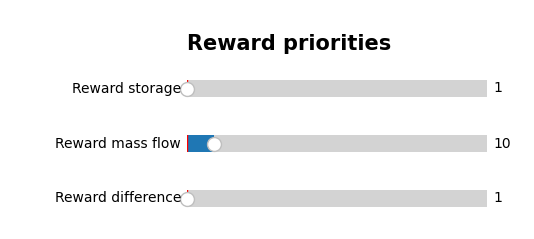

you'll need to access it like so: 


In [4]:
weight_reward_storage = 1
weight_reward_mass_flow = 10
weight_reward_difference = 1

imgs, obs_dict, rewards, q_vals = plot_data[(weight_reward_storage , weight_reward_mass_flow, weight_reward_difference)]

where: 
* imgs is a set of PIL images for showing the environment
* obs_dict is an internal data structure of pandapipes (*not so relevant right now*)
* **rewards** is the dataframe containing the rewards per time step
* q_vals is the sequence of q values the agent reported for the giving weighting

`rewards` should be interpreted as a time series, as it is typically used in reinforcement learning:
$$
S_0, R_0, A_0, S_1, R_1, A_1, \ldots
$$
except that in our case, $R_t$ is already vector-valued (3 signals for now). We can use this for a simple correlation plot:

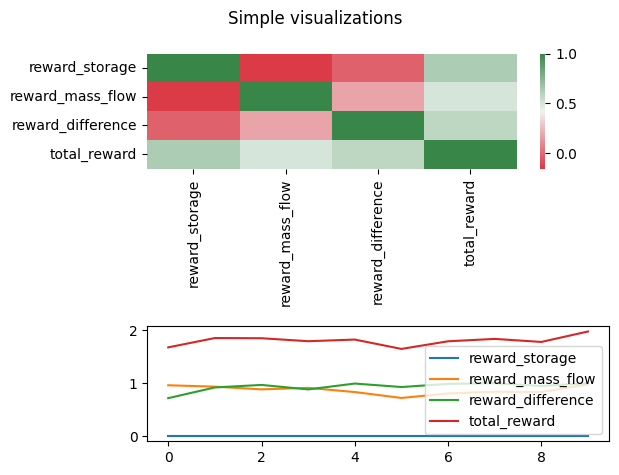

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Simple visualizations')
interaction_matrix = all_reward_trajectories
corr = interaction_matrix.corr()
ax = sns.heatmap(corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap=sns.diverging_palette(10, 133, n=256, as_cmap=True),
    ax=ax1)
plt.tight_layout()
rewards.plot(ax=ax2)
plt.show()

or, we use a pyqualicision interaction matrix for that purpose